Dataset shape: (569, 30)
Features: 30


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Train: (455, 30), Test: (114, 30)

Decision Tree (no max_depth) test accuracy: 0.9123
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

5-fold CV accuracy (full tree): 0.9173 ± 0.0242

Decision Tree (max_depth=4) test accuracy: 0.9386
5-fold CV accuracy (max_depth=4): 0.9209 ± 0.0202


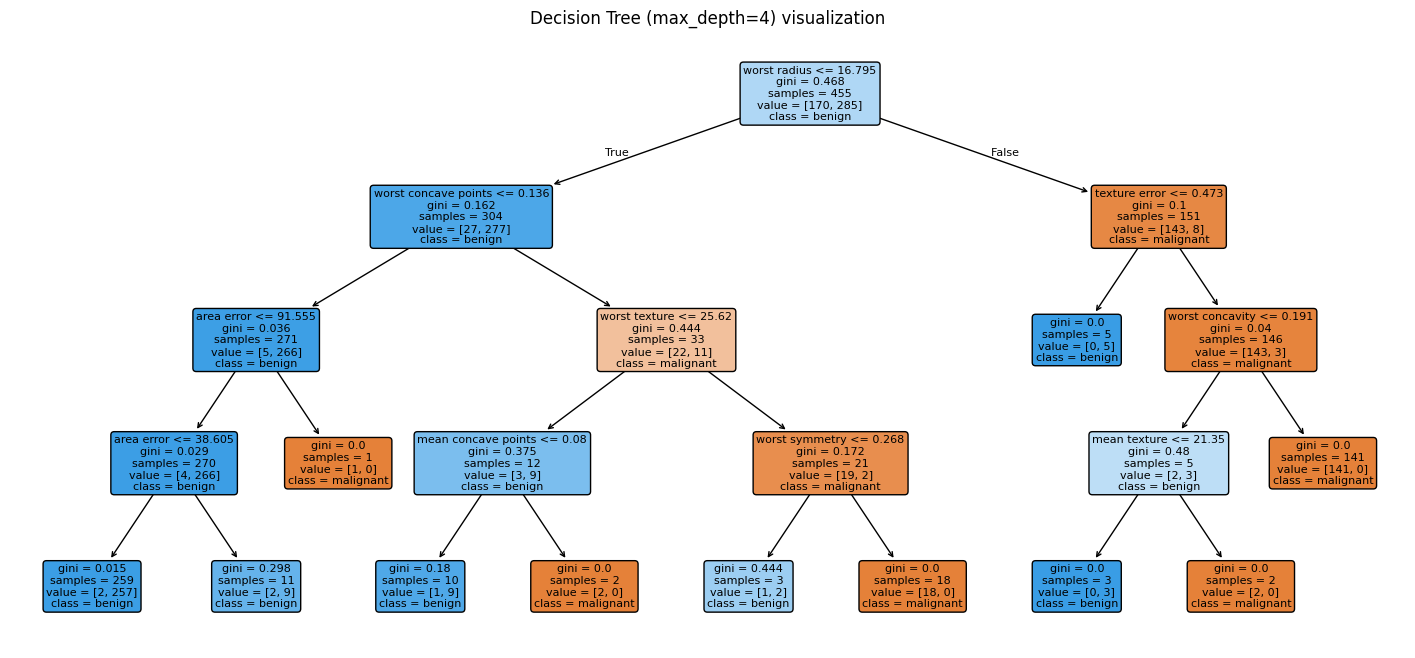

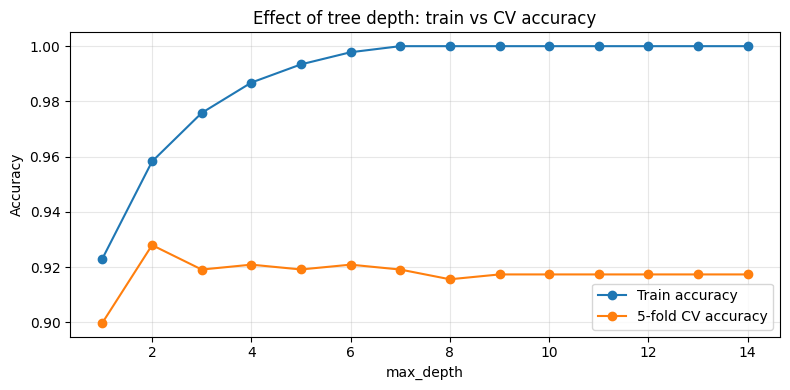


Random Forest test accuracy: 0.9561
Random Forest OOB score: 0.9604

Classification report (Random Forest):
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

5-fold CV accuracy (Random Forest): 0.9578 ± 0.0238

Top 10 Decision Tree feature importances (max_depth=4):


,0
worst radius,0.733548
worst concave points,0.122028
texture error,0.045785
worst texture,0.032319
worst concavity,0.017161
mean concave points,0.013327
area error,0.012704
mean texture,0.011846
worst symmetry,0.011282
mean area,0.000000



Top 10 Random Forest feature importances:


,0
worst perimeter,0.133100
worst area,0.128052
worst concave points,0.108107
mean concave points,0.094414
worst radius,0.090639
mean radius,0.058662
mean perimeter,0.055242
mean area,0.049938
mean concavity,0.046207
worst concavity,0.035357


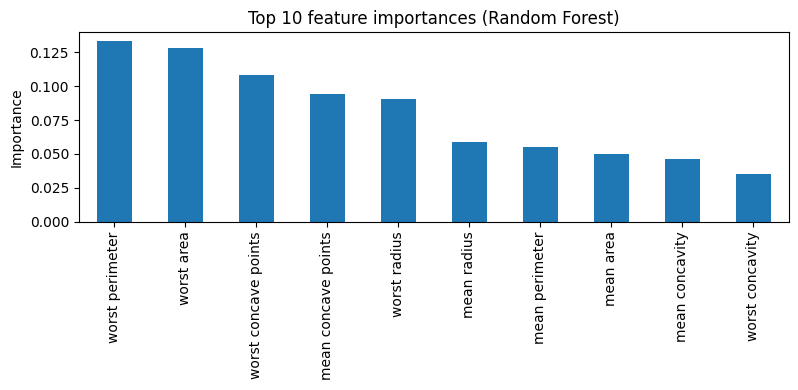


GridSearch best params (DecisionTree): {'max_depth': 4, 'min_samples_split': 2}
GridSearch best CV score: 0.9384615384615385
Test accuracy (best DT): 0.9386


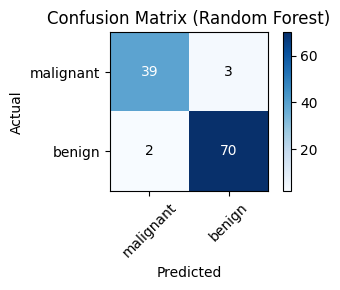


Saved rf_feature_importances.csv and depth_vs_accuracy.csv

Notes:
- Decision trees can easily overfit; controlling parameters such as max_depth, min_samples_split,
  and min_samples_leaf helps control complexity.
- Random forests reduce variance by averaging many randomized trees; OOB score is a useful
  internal estimate of generalization.
- Feature importances from tree models indicate which features were useful for splits,
  but they can be biased toward features with many levels; use permutation importance for
  a more reliable ranking if needed.
- Use cross-validation and (optionally) GridSearchCV to tune hyperparameters.



In [1]:
# Decision Trees & Random Forests - Classification (scikit-learn)
# - Default: Breast Cancer dataset (binary classification)
# - Shows: training, visualization, overfitting control, RandomForest, feature importances, CV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate

RANDOM_STATE = 42
TEST_SIZE = 0.2

# -------------------------
# 1) Load dataset (default)
# -------------------------
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target
feature_names = data.feature_names

print("Dataset shape:", X.shape)
print("Features:", len(feature_names))

# Quick preview
display(X.head())

# -------------------------
# 2) Train / Test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# -------------------------
# 3) Decision Tree - default (unrestricted) - show overfitting
# -------------------------
dt_full = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt_full.fit(X_train, y_train)

y_pred_full = dt_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)
print("\nDecision Tree (no max_depth) test accuracy: {:.4f}".format(acc_full))
print(classification_report(y_test, y_pred_full))

# Cross-validation to estimate generalization
cv_scores_full = cross_val_score(dt_full, X, y, cv=5)
print("5-fold CV accuracy (full tree): {:.4f} ± {:.4f}".format(cv_scores_full.mean(), cv_scores_full.std()))

# -------------------------
# 4) Decision Tree - controlled depth (prevent overfitting)
# -------------------------
dt_limited = DecisionTreeClassifier(max_depth=4, random_state=RANDOM_STATE)
dt_limited.fit(X_train, y_train)
y_pred_lim = dt_limited.predict(X_test)
acc_lim = accuracy_score(y_test, y_pred_lim)
print("\nDecision Tree (max_depth=4) test accuracy: {:.4f}".format(acc_lim))
cv_scores_lim = cross_val_score(dt_limited, X, y, cv=5)
print("5-fold CV accuracy (max_depth=4): {:.4f} ± {:.4f}".format(cv_scores_lim.mean(), cv_scores_lim.std()))

# Visualize the limited tree (easier to read)
plt.figure(figsize=(18,8))
plot_tree(dt_limited,
          feature_names=feature_names,
          class_names=data.target_names,
          filled=True,
          rounded=True,
          fontsize=8)
plt.title("Decision Tree (max_depth=4) visualization")
plt.show()

# -------------------------
# 5) Analyze effect of depth (train vs cv)
# -------------------------
depths = list(range(1, 15))
train_scores = []
cv_means = []
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=RANDOM_STATE)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    cv = cross_val_score(clf, X, y, cv=5)
    cv_means.append(cv.mean())

plt.figure(figsize=(8,4))
plt.plot(depths, train_scores, marker='o', label='Train accuracy')
plt.plot(depths, cv_means, marker='o', label='5-fold CV accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Effect of tree depth: train vs CV accuracy')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------------
# 6) Random Forest classifier
# -------------------------
rf = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest test accuracy: {:.4f}".format(acc_rf))
print("Random Forest OOB score: {:.4f}".format(rf.oob_score_))
print("\nClassification report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Cross-validate Random Forest
cv_scores_rf = cross_val_score(rf, X, y, cv=5)
print("5-fold CV accuracy (Random Forest): {:.4f} ± {:.4f}".format(cv_scores_rf.mean(), cv_scores_rf.std()))

# -------------------------
# 7) Feature importances
# -------------------------
fi_dt = pd.Series(dt_limited.feature_importances_, index=feature_names).sort_values(ascending=False)
fi_rf = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)

print("\nTop 10 Decision Tree feature importances (max_depth=4):")
display(fi_dt.head(10))

print("\nTop 10 Random Forest feature importances:")
display(fi_rf.head(10))

# Plot top 10 from RF
plt.figure(figsize=(8,4))
fi_rf.head(10).plot(kind='bar')
plt.title("Top 10 feature importances (Random Forest)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# -------------------------
# 8) Grid search for best tree depth (optional)
# -------------------------
param_grid = {'max_depth': [2, 3, 4, 5, 6, None], 'min_samples_split': [2, 5, 10]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_STATE), param_grid, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)
print("\nGridSearch best params (DecisionTree):", gs.best_params_)
print("GridSearch best CV score:", gs.best_score_)

# Evaluate best estimator on test
best_dt = gs.best_estimator_
y_pred_best = best_dt.predict(X_test)
print("Test accuracy (best DT): {:.4f}".format(accuracy_score(y_test, y_pred_best)))

# -------------------------
# 9) Confusion matrix (Random Forest)
# -------------------------
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4,3))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.colorbar()
plt.xticks([0,1], data.target_names, rotation=45)
plt.yticks([0,1], data.target_names)
for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha='center', va='center', color='white' if v > cm.max()/2 else 'black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# -------------------------
# 10) Save results (CSV)
# -------------------------
fi_rf.to_csv('rf_feature_importances.csv')
pd.DataFrame({'depths': depths, 'train_acc': train_scores, 'cv_acc': cv_means}).to_csv('depth_vs_accuracy.csv', index=False)
print("\nSaved rf_feature_importances.csv and depth_vs_accuracy.csv")

# -------------------------
# Notes & next steps
# -------------------------
notes = """
Notes:
- Decision trees can easily overfit; controlling parameters such as max_depth, min_samples_split,
  and min_samples_leaf helps control complexity.
- Random forests reduce variance by averaging many randomized trees; OOB score is a useful
  internal estimate of generalization.
- Feature importances from tree models indicate which features were useful for splits,
  but they can be biased toward features with many levels; use permutation importance for
  a more reliable ranking if needed.
- Use cross-validation and (optionally) GridSearchCV to tune hyperparameters.
"""
print(notes)

# If you'd like to run regression examples with DecisionTreeRegressor / RandomForestRegressor,
# I can provide those too.
